# Rotten Tomatoes Movie Review

In [1]:
import numpy as np
import pandas as pd
import nltk # natural langurage tool kit
import re # regualr expressions
from nltk.corpus import stopwords 

In [2]:
from nltk.stem import PorterStemmer

In [3]:
stop = stopwords.words('english')
stop.remove('not') # in sentiment analyis this not stop word
#stop.append('srikanth') # you customize stopwords like this

**Step -1 : Load Dataset**

In [4]:
dataset = pd.read_csv('train_new.tsv',delimiter='\t',encoding='latin-1')

In [5]:
dataset.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,A series of escapades demonstrating the adage ...,1
1,63,64,2,"This quiet , introspective and entertaining in...",4
2,81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
3,116,117,4,A positively thrilling combination of ethnogra...,3
4,156,157,5,Aggressive self-glorification and a manipulati...,1


** Step -2 : Cleaning text , steming, removing stopwords**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 5 columns):
Unnamed: 0    2627 non-null int64
PhraseId      2627 non-null int64
SentenceId    2627 non-null int64
Phrase        2627 non-null object
Sentiment     2627 non-null int64
dtypes: int64(4), object(1)
memory usage: 102.7+ KB


In [7]:
text = dataset['Phrase']

In [8]:
review = text
review

0       A series of escapades demonstrating the adage ...
1       This quiet , introspective and entertaining in...
2       Even fans of Ismail Merchant 's work , I suspe...
3       A positively thrilling combination of ethnogra...
4       Aggressive self-glorification and a manipulati...
5       A comedy-drama of nearly epic proportions root...
6       Narratively , Trouble Every Day is a plodding ...
7       The Importance of Being Earnest , so thick wit...
8                   But it does n't leave you with much .
9                 You could hate it for the same reason .
10      There 's little to recommend Snow Dogs , unles...
11      Kung Pow is Oedekerk 's realization of his chi...
12                 The performances are an absolute joy .
13      Fresnadillo has something serious to say about...
14      I still like Moonlight Mile , better judgment ...
15      A welcome relief from baseball movies that try...
16      a bilingual charmer , just like the woman who ...
17      Like a

In [9]:
data = []
for i in range(len(dataset)):
    review = text[i] # change into i
    # step -1: converting letter into lower case
    review = review.lower()
    # step -2: removing special character and numerics
    review = re.sub('[^a-z]',' ',review)
    # step -3: convert sentence into list of words -> tokens
    review = review.split()
    # step -4: Stemming(extracting root word) and removing stopwords
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stop)]
    review = ' '.join(review)# step 5: joining words 
    data.append(review) # appending data
    

**Step- 3 : Bag of word model**
- CountVectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer()

In [12]:
# Converting words into numbers (Word Embedding)
X = cv.fit_transform(data).toarray() # all the clean stentence are in my data
y = dataset['Sentiment'].values 

In [13]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

6078
['aaliyah', 'abandon', 'abel', 'abhorr', 'abil', 'abl', 'abort', 'abound', 'abridg', 'abrupt', 'absolut', 'absorb', 'absorpt', 'abstract', 'absurd', 'absurdist', 'absurdli', 'abund', 'abus', 'academ', 'academi', 'accent', 'accept', 'access', 'accompani', 'accomplish', 'account', 'accumul', 'accur', 'ach', 'achero', 'achiev', 'achingli', 'acid', 'ackerman', 'acknowledg', 'acquaint', 'acquir', 'acrid', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actorish', 'actress', 'actual', 'acumen', 'acut', 'ad', 'adag', 'adam', 'adapt', 'add', 'addict', 'addit', 'address', 'adequ', 'adject', 'adjust', 'admir', 'admiss', 'admit', 'admittedli', 'adolesc', 'ador', 'adren', 'adrenalin', 'adrien', 'adrift', 'adult', 'advanc', 'advantag', 'adventu', 'adventur', 'advert', 'advic', 'aesop', 'aesthet', 'affabl', 'affair', 'affect', 'affection', 'affirm', 'affleck', 'aficionado', 'afloat', 'african', 'afterlif', 'afternoon', 'aftertast', 'age', 'agenda', 'agent', 'ager', 'aggress', 'agil', 

**Step -4: Spliting data into traning and testing set**

In [14]:
from sklearn.cross_validation import train_test_split

/home/saisrikar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                   random_state =0 )

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2101, 6078), (526, 6078), (2101,), (526,))

**Step -5: Building Machine Learning Mode -> MultinomialNB, GaussianNB**

In [17]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [18]:
model_M = MultinomialNB() # alpha is tuning parameter
model_G = GaussianNB()

In [19]:
model_M.fit(x_train,y_train)
model_G.fit(x_train,y_train)
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

**Step -6 Evaluation Model**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
cm_M = confusion_matrix(y_test,y_pred_M)
cm_G = confusion_matrix(y_test,y_pred_G)

cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test, y_pred_G)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

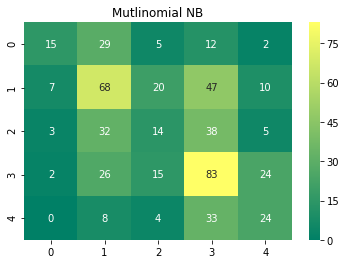

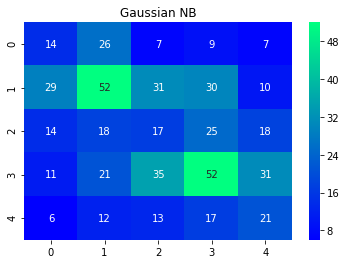

             precision    recall  f1-score   support

          0       0.56      0.24      0.33        63
          1       0.42      0.45      0.43       152
          2       0.24      0.15      0.19        92
          3       0.39      0.55      0.46       150
          4       0.37      0.35      0.36        69

avg / total       0.39      0.39      0.37       526

             precision    recall  f1-score   support

          0       0.19      0.22      0.20        63
          1       0.40      0.34      0.37       152
          2       0.17      0.18      0.17        92
          3       0.39      0.35      0.37       150
          4       0.24      0.30      0.27        69

avg / total       0.31      0.30      0.30       526



In [23]:
sns.heatmap(cm_M,annot=True,cmap='summer')
plt.title('Mutlinomial NB')
plt.show()
sns.heatmap(cm_G,annot=True,cmap='winter')
plt.title('Gaussian NB')
plt.show()
print(cr_M)
print('='*50)
print(cr_G)